Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


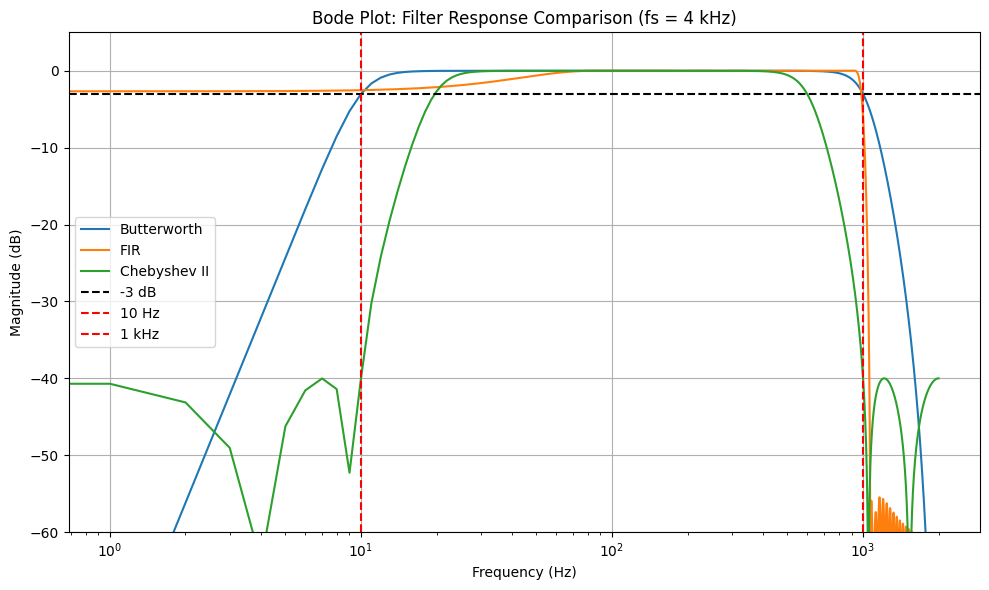

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

fs=4e3

freq_axis = np.linspace(0, fs/2, 2000) # Need to adjust frequency axis for new sampling rate

# Butterworth bandpass
nyq = fs/2
f1 = 10
f2 = 1000

b_butter, a_butter = signal.butter(4, [f1/nyq, f2/nyq], btype='band')
w_butter, h_butter = signal.freqz(b_butter, a_butter, worN=len(freq_axis))

# FIR bandpass
b_fir = signal.firwin(101, [f1/nyq, f2/nyq], pass_zero=False)
w_fir, h_fir = signal.freqz(b_fir, [1], worN=len(freq_axis))

# IIR Chebyshev Type II
b_iir, a_iir = signal.cheby2(4, 40, [f1/nyq, f2/nyq], btype='band')
w_iir, h_iir = signal.freqz(b_iir, a_iir, worN=len(freq_axis))

plt.figure(figsize=(10, 6))
plt.plot(freq_axis, 20 * np.log10(np.abs(h_butter)), label='Butterworth')
plt.plot(freq_axis, 20 * np.log10(np.abs(h_fir)), label='FIR')
plt.plot(freq_axis, 20 * np.log10(np.abs(h_iir)), label='Chebyshev II')
plt.axhline(y=-3, color='k', linestyle='--', label='-3 dB')
plt.axvline(x=10, color='r', linestyle='--', label='10 Hz')
plt.axvline(x=1000, color='r', linestyle='--', label='1 kHz')
plt.xscale('log')
plt.grid(True)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('Bode Plot: Filter Response Comparison (fs = 4 kHz)')
plt.ylim(-60, 5)
plt.legend()
plt.tight_layout()
plt.savefig('figures/filter_comparison.png', dpi=300, bbox_inches='tight')